# **EDA on Sachin Tendulkar International Centuries**

In [44]:
# Impoprtation of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

## Data Loading

In [45]:
data = pd.read_csv('/content/Sachin_Tendulkar_Centuries.csv')

## Initial Data Exploration

In [46]:
data.head() # it will display first few rows of the data

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
0,1.0,09-09-1994,110.0,84.61,ODI,2.0,1.0,Yes,Yes,No,Australia,"R. Premadasa Stadium, Colombo",Neutral,Won
1,2.0,28-10-1994,115.0,84.55,ODI,2.0,2.0,Yes,Yes,No,New Zealand,"IPCL Sports Complex Ground, Vadodara",Home,Won
2,3.0,11-11-1994,105.0,78.35,ODI,2.0,1.0,Yes,No,No,West Indies,"Sawai Mansingh Stadium, Jaipur",Home,Won
3,4.0,09-04-1995,112.0,104.67,ODI,2.0,2.0,No,Yes,No,Sri Lanka,"Sharjah Cricket Association Stadium, Sharjah",Neutral,Won
4,5.0,18-02-1996,127.0,92.02,ODI,2.0,2.0,No,Yes,No,Kenya,"Barabati Stadium, Cuttack",Home,Won


In [47]:
data.info() # it will tells us about the datatype of each and every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No.             100 non-null    float64
 1   Date              100 non-null    object 
 2   Score             100 non-null    float64
 3   Strike Rate       100 non-null    float64
 4   Type of Match     100 non-null    object 
 5   Position          100 non-null    float64
 6   Innings           100 non-null    float64
 7   Dismissed         100 non-null    object 
 8   Man of the Match  100 non-null    object 
 9   Captain           100 non-null    object 
 10  Against           100 non-null    object 
 11  Venue             100 non-null    object 
 12  H/A/N             100 non-null    object 
 13  Result            100 non-null    object 
dtypes: float64(5), object(9)
memory usage: 11.2+ KB


In [48]:
data.isnull().sum()  # Check for null values

,0
S.No.,1
Date,1
Score,1
Strike Rate,1
Type of Match,1
Position,1
Innings,1
Dismissed,1
Man of the Match,1
Captain,1


In [49]:
data = data.drop(data.index[-1]) # This will remove the whole last row which is fully blank

In [50]:
data.duplicated().sum() # Check for duplicate values

0

## Data Summary Statistics


In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,100.0,50.500,29.011492,1.00,25.7500,50.50,75.250,100.00
Score,100.0,135.560,33.334642,100.00,111.0000,124.00,149.000,248.00
Strike Rate,100.0,80.369,25.063461,41.11,58.6275,77.92,98.275,138.61
Position,100.0,3.140,1.206213,1.00,2.0000,4.00,4.000,6.00
Innings,100.0,1.630,0.786952,1.00,1.0000,1.00,2.000,4.00


## Univariate Analysis

### Categorical Columns

In [52]:
data.columns

Index(['S.No.', 'Date', 'Score', 'Strike Rate', 'Type of Match', 'Position',
       'Innings', 'Dismissed', 'Man of the Match', 'Captain', 'Against',
       'Venue', 'H/A/N', 'Result'],
      dtype='object')

In [53]:
cat_cols = ['Position', 'Innings','Type of Match','Captain', 'Against',
       'Venue', 'H/A/N', 'Result']

In [54]:
data['Position'].value_counts()

,count
Position,
4.0,48
2.0,40
1.0,5
5.0,5
6.0,2


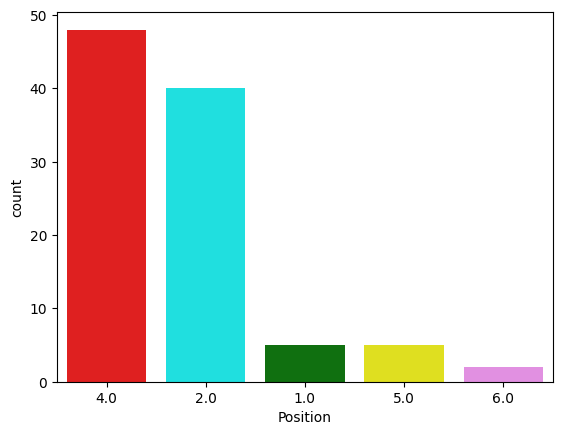

In [55]:
sns.countplot(
    data=data,
    x='Position',
    order=data['Position'].value_counts().index,
    palette=['red', 'aqua', 'green', 'yellow', 'violet']
)
plt.show()

So,
Highest number of Centuries of Sachin comest on number 4 position

In [56]:
data['Innings'].value_counts()

,count
Innings,
1.0,53
2.0,34
3.0,10
4.0,3


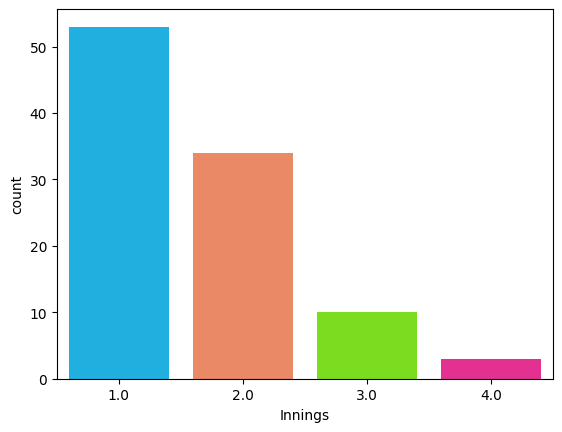

In [57]:
sns.countplot(
    data=data,
    x='Innings',
    order=data['Innings'].value_counts().index,
    palette=['deepskyblue', 'coral', 'lawngreen', 'deeppink'])
plt.show()

Mostly Centuries are Scored in first inning even more than half of his centuries comes in first inning of the match

In [58]:
data['Captain'].value_counts()

,count
Captain,
No,87
Yes,13


<Axes: xlabel='Captain', ylabel='count'>

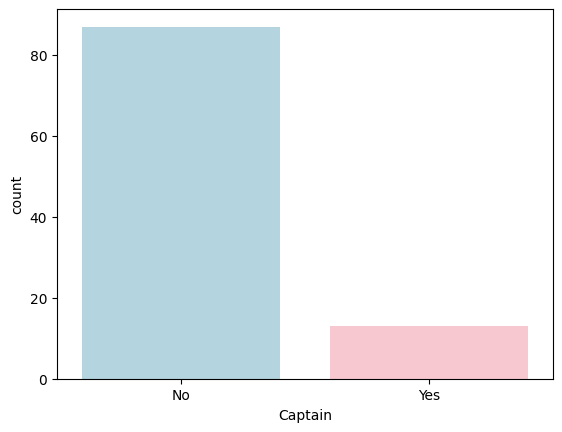

In [59]:
sns.countplot(
    data=data,
    x='Captain',
    order=data['Captain'].value_counts().index,
    palette=['lightblue', 'pink', 'green', 'yellow', 'violet']
)

Majority of the Centuries comes when Sachin is not Captaining the site

And we can also infer that Captaincy pressure also affect his batting performances

In [60]:
data['Type of Match'].value_counts()

,count
Type of Match,
Test,51
ODI,49


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

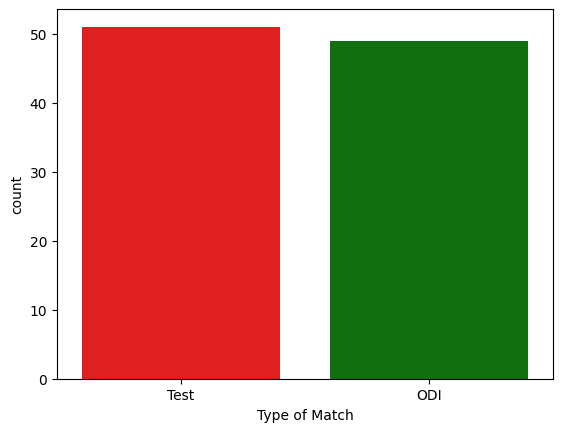

In [61]:
sns.countplot(
    data=data,
    x='Type of Match',
    order=data['Type of Match'].value_counts().index,
    palette=['red', 'green', 'yellow', 'violet']
)
plt

By the above plotting we can see that he is too good in both the formats ODI and Test Cricket.

In [62]:
data['Venue'].value_counts()

,count
Venue,
"Sharjah Cricket Association Stadium, Sharjah",7
"R. Premadasa Stadium, Colombo",5
"M. A. Chidambaram Stadium, Chennai",5
"Sinhalese Sports Club Ground, Colombo",5
"M. Chinnaswamy Stadium, Bangalore",4
"Sydney Cricket Ground, Sydney",4
"Vidarbha Cricket Association Ground, Nagpur",3
"Sher-e-Bangla National Stadium, Mirpur",3
"Eden Gardens, Kolkata",3


Highest no. of Cernturies comes at Sharjah Stadium, UAE

Even out of Top 5 Venues where most of his centuries came majority are out of India so it clearly give insights about the goodness of Sachin as batsman

In [63]:
data['H/A/N'].value_counts()

,count
H/A/N,
Home,42
Away,41
Neutral,17


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

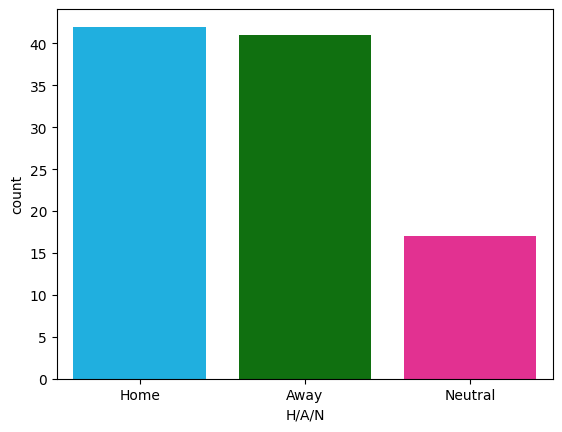

In [64]:
sns.countplot(
    data=data,
    x='H/A/N',
    order=data['H/A/N'].value_counts().index,
    palette=['deepskyblue', 'green', 'deeppink', 'darkorchid']
)
plt

He Score nearly Equal no. of Centuries at both home and Away Venues

In [65]:
data['Result'].value_counts()


,count
Result,
Won,53
Lost,25
Drawn,20
No result,1
Tied,1


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

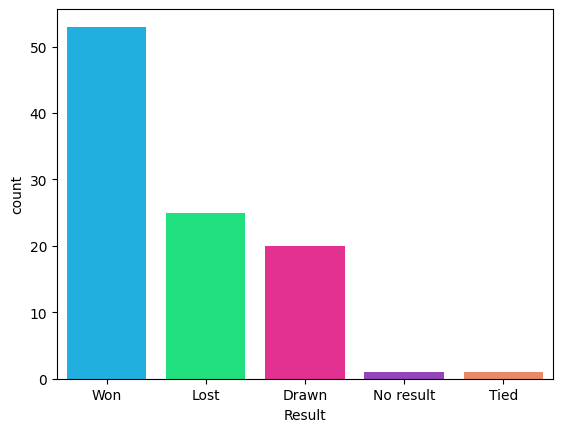

In [66]:
sns.countplot(
    data=data,
    x='Result',
    order=data['Result'].value_counts().index,
    palette=['deepskyblue', 'springgreen', 'deeppink', 'darkorchid','coral']
)
plt

Majority Of Sachin's Centuries are come under winning cause of India

In [67]:
data['Against'].value_counts()

,count
Against,
Australia,20
Sri Lanka,17
South Africa,12
New Zealand,9
England,9
Zimbabwe,8
West Indies,7
Pakistan,7
Bangladesh,6


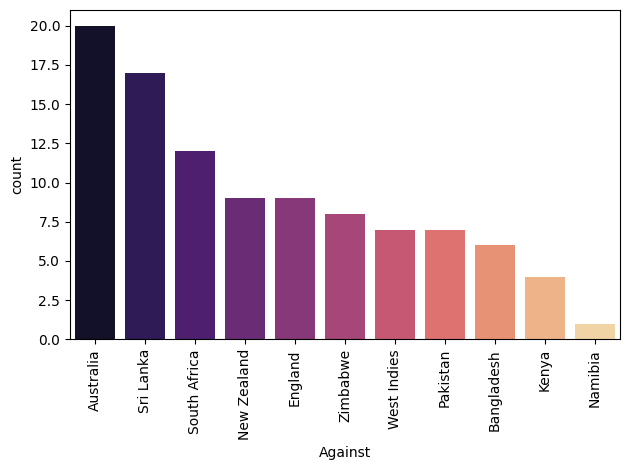

In [68]:
sns.countplot(
    data=data,
    x='Against',
    order=data['Against'].value_counts().index, palette= 'magma')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

He Scored highest number of Centuries against Australia which is considered one of the most toughest cricketing nation

### Numerical Columns

In [69]:
num_cols = ['Score', 'Strike Rate']

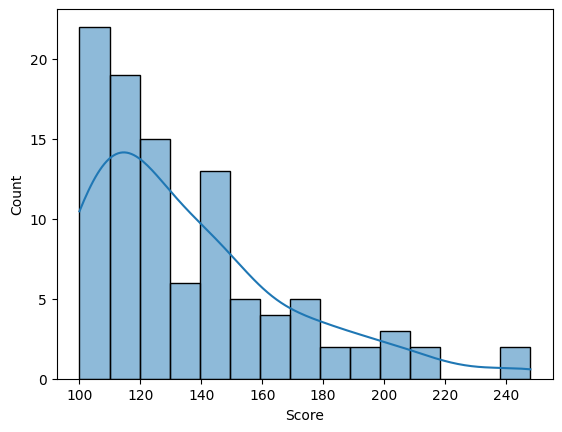

In [70]:
sns.histplot(data['Score'], kde=True, binwidth = 10 )
plt.show()

Score plotting of Sachin Centuries are highly Right Skewed which tells us that most centuries scores are between 100 - 130

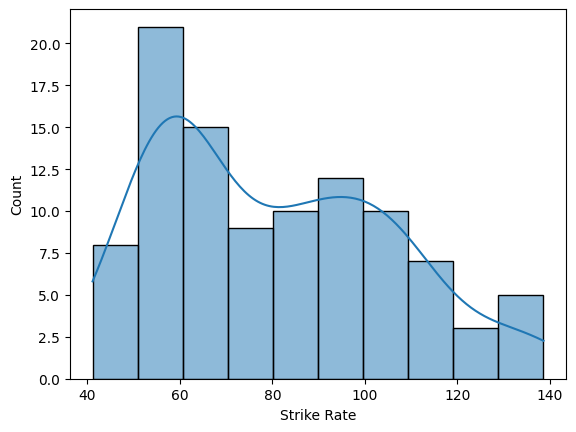

In [71]:
sns.histplot(data['Strike Rate'], kde=True, binwidth = 10)
plt.show()


Majority of Centuries were scored with a range of Strike Rate 50 - 70.

## Bivariate Analysis

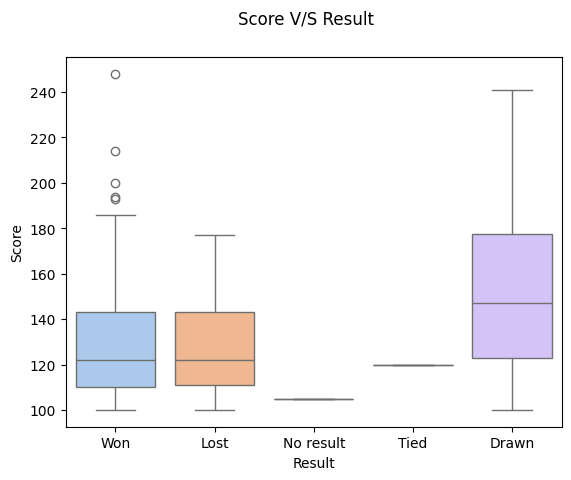

In [72]:
plt.suptitle('Score V/S Result')
sns.boxplot(data=data, x='Result', y='Score', palette='pastel')
plt.show()

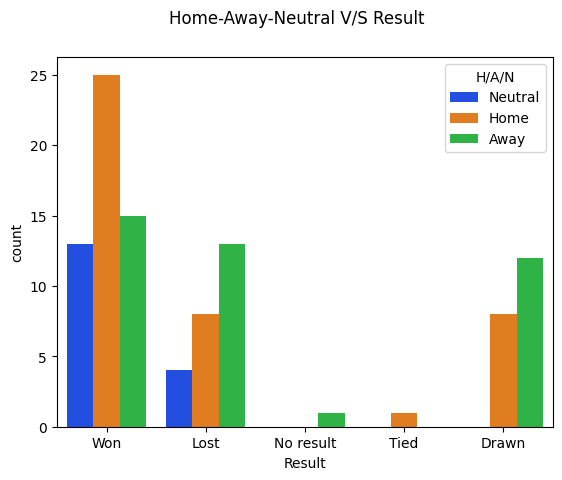

In [73]:
plt.suptitle('Home-Away-Neutral V/S Result')
sns.countplot(data=data, x='Result', hue='H/A/N', palette='bright')
plt.show()

In [74]:
data.groupby('Innings')['Score'].mean()

,Score
Innings,
1.0,137.283019
2.0,137.970588
3.0,123.100000
4.0,119.333333


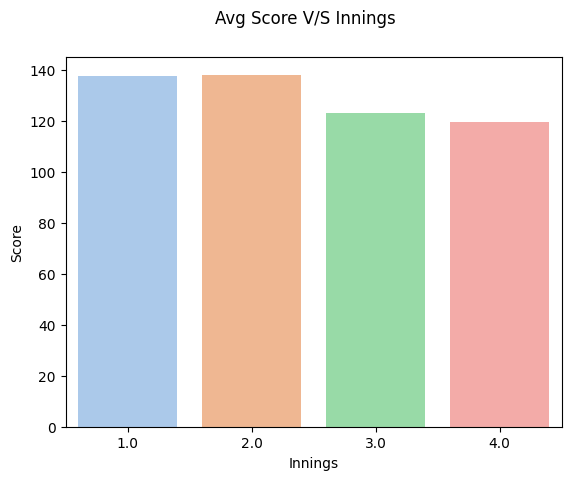

In [75]:
plt.suptitle('Avg Score V/S Innings')
sns.barplot(data=data, x='Innings', y='Score',estimator= 'mean', ci = None , palette='pastel')
plt.show()


Sachin's Average while scoring a century is nearly same across all the innings.

In [76]:
data.groupby('Against')['Score'].mean()

,Score
Against,
Australia,143.300000
Bangladesh,138.833333
England,134.111111
Kenya,128.250000
Namibia,152.000000
New Zealand,144.333333
Pakistan,130.285714
South Africa,128.833333
Sri Lanka,127.705882


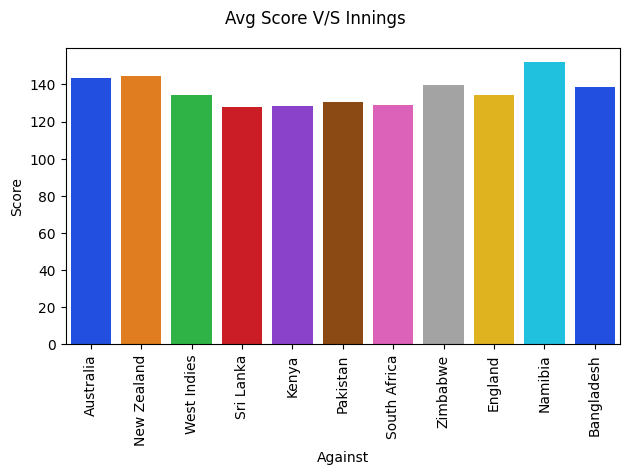

In [77]:
plt.suptitle('Avg Score V/S Innings')
sns.barplot(data=data, x='Against', y='Score',estimator= 'mean', ci = None , palette='bright')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Average is Highest Against Namibia

and against none of the opponent Sachin's Average is below 120 while Scoring a Century

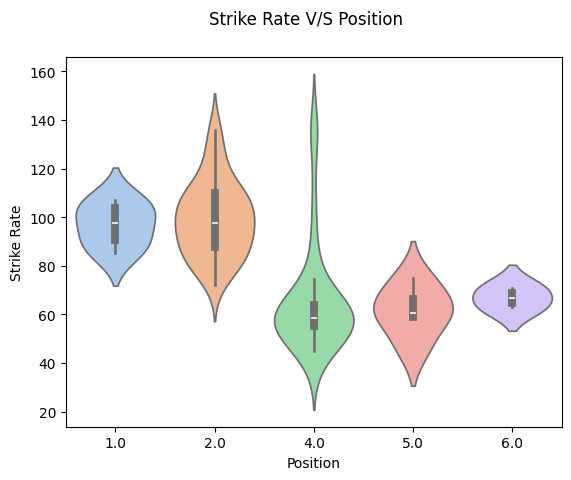

In [78]:
plt.suptitle('Strike Rate V/S Position')
sns.violinplot(data=data, x='Position', y='Strike Rate', palette='pastel')
plt.show()

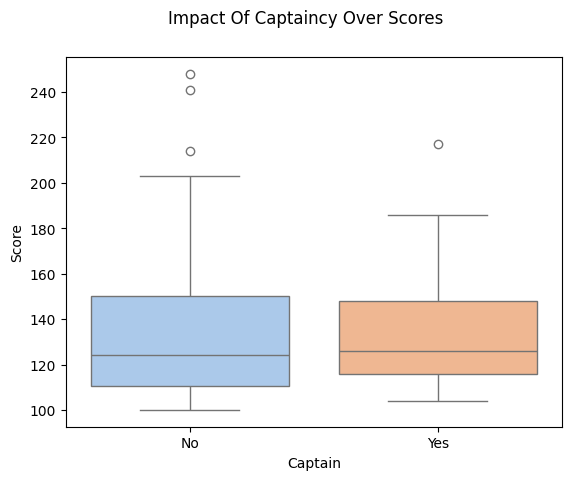

In [79]:
plt.suptitle('Impact Of Captaincy Over Scores')
sns.boxplot(data=data, x='Captain', y='Score', palette='pastel')
plt.show()

## Correlation Analysis

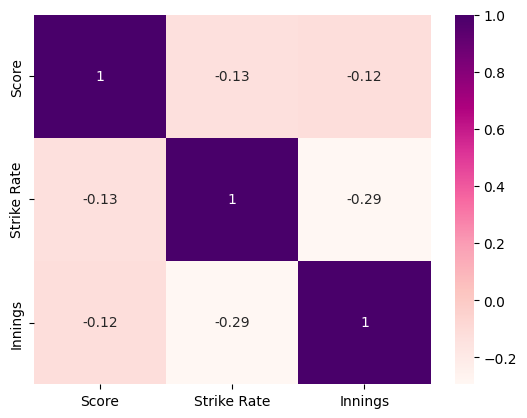

In [80]:
sns.heatmap(data[['Score', 'Strike Rate', 'Innings']].corr(numeric_only= True), annot=True, cmap='RdPu')
plt.show()

## Performance Insights

In [81]:
data['Score'].max() # This Is the highest Score of Sachin Tendulkar

248.0

In [82]:
data['Score'].mean() # This is the Average Score of Sachin Tendulkar while Scoring a Century

135.56

In [104]:
data[data['Score'] >= 200].value_counts().sum() # Sachin Scored 7 Double Centuries in his entire Carrier

7

## Additional Plots

In [83]:
data['Date'] = pd.to_datetime(data['Date'], format = 'mixed', dayfirst = True)

In [92]:
data.tail()

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result,Year
95,96.0,2010-02-14,106.0,136.05,Test,4.0,2.0,Yes,No,No,South Africa,"Eden Gardens, Kolkata",Home,Won,2010
96,97.0,2010-07-26,203.0,58.50,Test,4.0,2.0,Yes,No,No,Sri Lanka,"Sinhalese Sports Club Ground, Colombo",Away,Drawn,2010
97,98.0,2010-10-09,214.0,58.95,Test,4.0,2.0,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won,2010
98,99.0,2010-12-16,111.0,46.05,Test,5.0,3.0,No,No,No,South Africa,"SuperSport Park, Centurion",Away,Lost,2010
99,100.0,2011-01-02,146.0,46.49,Test,4.0,2.0,Yes,No,No,South Africa,"Newlands Cricket Ground, Cape Town",Away,Drawn,2011


In [91]:
data['Year'] = data['Date'].dt.year

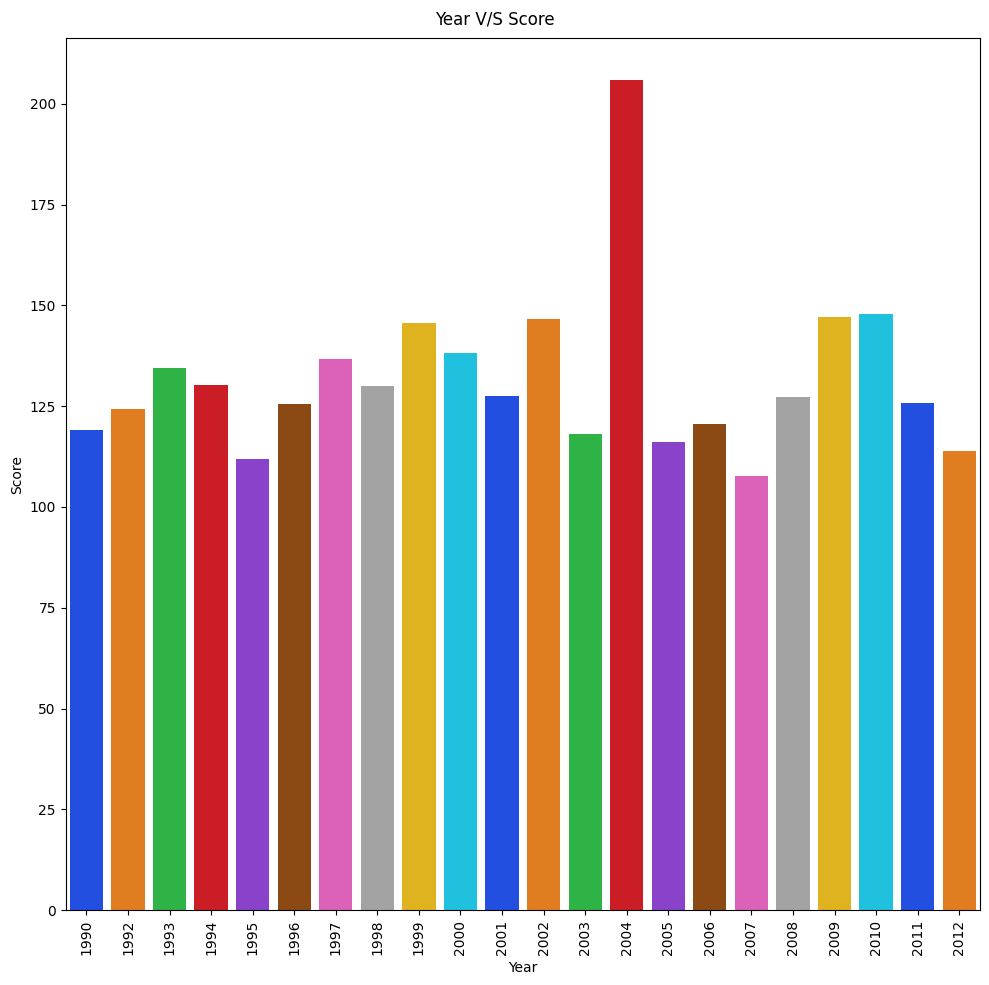

In [98]:
plt.figure(figsize = (10,10))
plt.suptitle('Year V/S Score')
sns.barplot(data=data, x='Year', y='Score', estimator = 'mean', ci = None, palette='bright')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Since Sachin Scored his first Century in 1990 , The only year is 1991 when Sachin failed to score a century till the end of his cricketing career

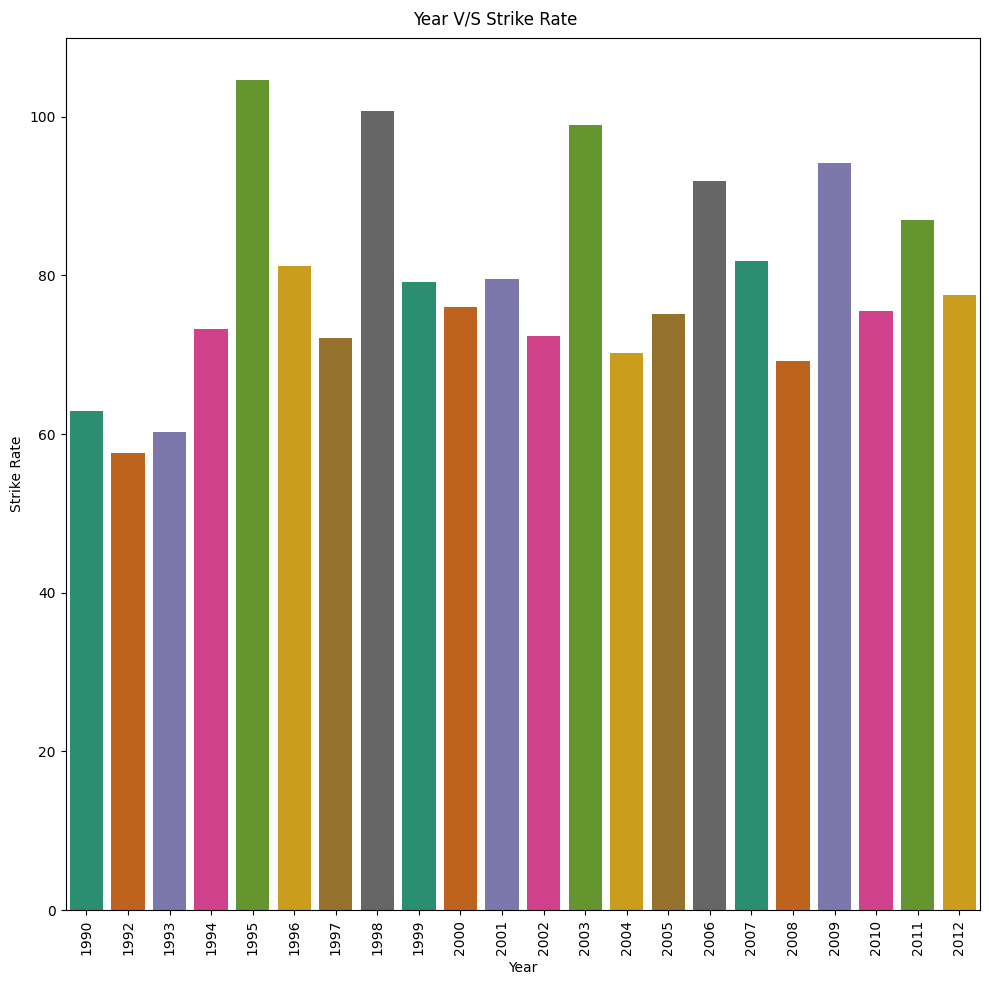

In [101]:
plt.figure(figsize = (10,10))
plt.suptitle('Year V/S Strike Rate')
sns.barplot(data=data, x='Year', y='Strike Rate', estimator = 'mean', ci = None, palette='Dark2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Sachin'S Strike Rate While Scoring a century is highest in 1995